# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [3]:
# student 1: Ofek 5108
# student 2: Liron 4630

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [4]:
# Load libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency

In [5]:
# load dataset
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")

# display first 5 rows of the train dataset
titanic_train['SibSp'].value_counts()


,count
SibSp,
0,475
1,179
2,21
4,18
3,12
8,4
5,3


In [6]:
# display first 5 rows of the test dataset
titanic_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


## Exploratory Data Analysis (EDA)

In [7]:
# Summary Statistics for Train
print('Summary Statistics for Train:')
print(titanic_train.describe())

Summary Statistics for Train:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.00000

In [8]:
# target variable distribution matrix
print('\nTarget Variable Distribution:')
print(titanic_train['Survived'].value_counts())


Target Variable Distribution:
Survived
0    431
1    281
Name: count, dtype: int64


### Relation between Survived and other catagorical columns using chi-square test

In [9]:
def relation_to_target(trainSet):
    target = trainSet['Survived']
    feature_col = trainSet.drop(['Survived'], axis=1)
    for col in feature_col.columns:
            if feature_col[col].dtype == 'int':
                ct = pd.crosstab(target, titanic_train[col])

                x=chi2_contingency(ct)
                if(x[1]<=0.05):
                    print('The P value is:{0} => {1} and {2} Dependent  (reject H0)'.format(x[1],'survived',col))
                else:
                    print('The P value is:{0} =>  {1} and {2} Independent (H0 holds true)'.format(x[1], 'survived',col))


relation_to_target(titanic_train)

## השתמשנו במבחן הזה כי עמודת המטרה היא קטגורית ורצינו לראות מה הקשר שלה לבין שאר העמודות הקטגוריות

The P value is:5.678603271827013e-17 => survived and Pclass Dependent  (reject H0)
The P value is:2.2668940926236894e-48 => survived and Sex Dependent  (reject H0)
The P value is:8.789507921670364e-05 => survived and SibSp Dependent  (reject H0)
The P value is:0.010048810072539258 => survived and Parch Dependent  (reject H0)
The P value is:5.271362205080295e-05 => survived and Embarked Dependent  (reject H0)


<Figure size 1200x1200 with 0 Axes>

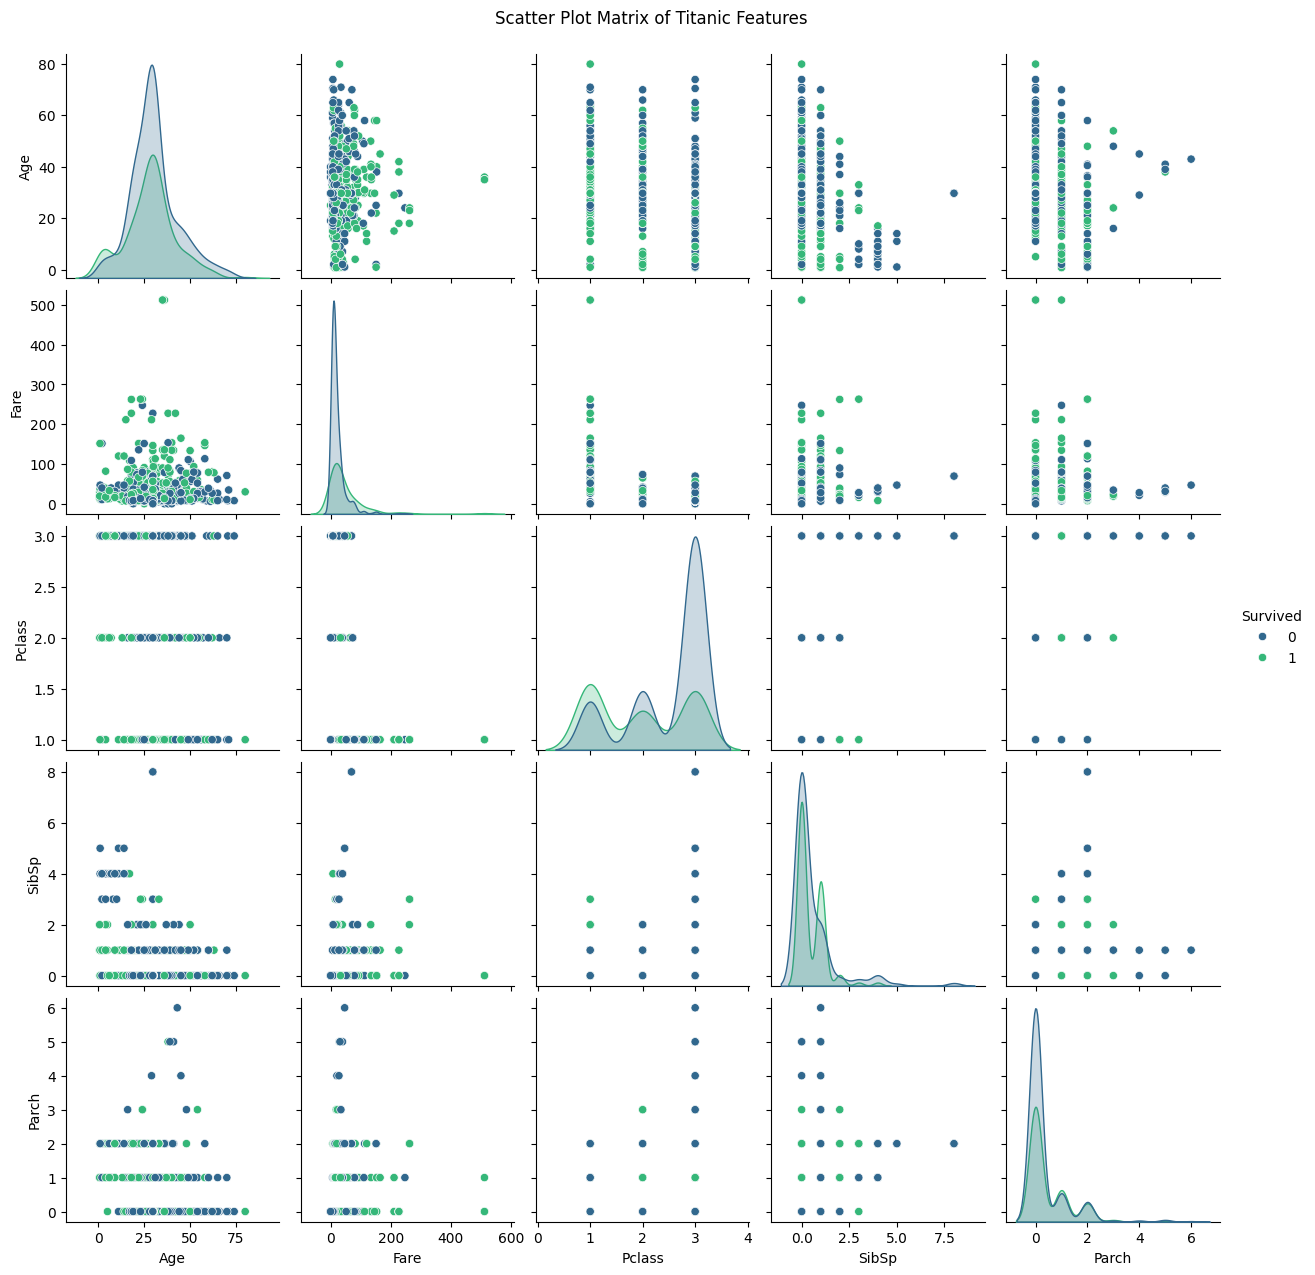

In [10]:
# Visualization 1: Scatter plot matrix of features colored by target
features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']
data = titanic_train[features].dropna()
plt.figure(figsize=(12, 12))
sns.pairplot(data, hue='Survived', vars=['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'], palette='viridis')
plt.suptitle('Scatter Plot Matrix of Titanic Features', y=1.02)
plt.show()

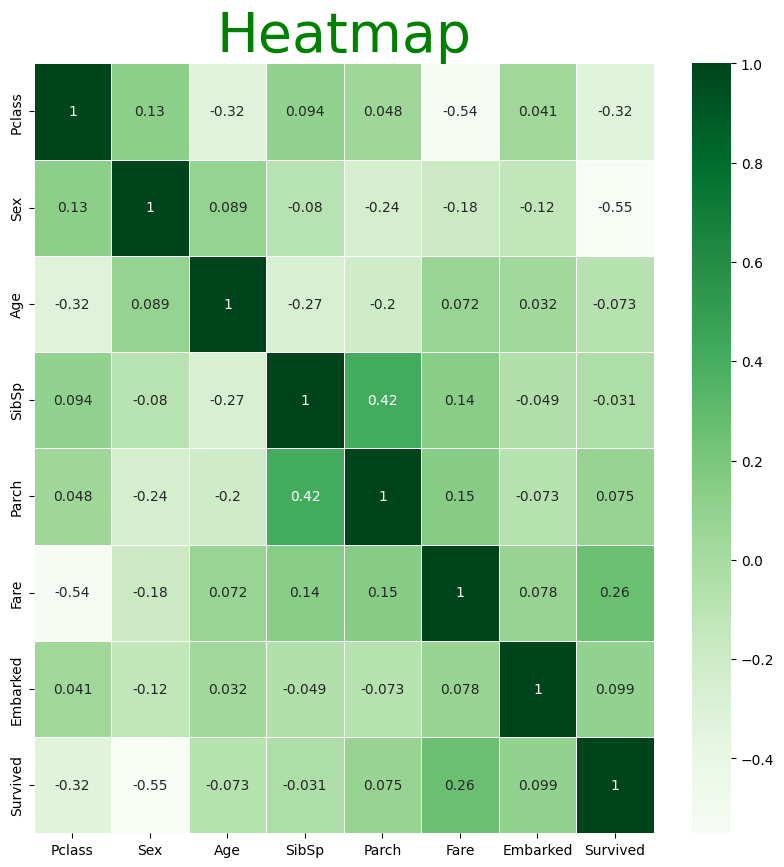

In [11]:
# Visualization 2 - Heatmap of Corrolation between features in order to see what we can assume
#Plot heatmap for correlation between the featurs and the target column.
plt.figure(figsize = (10,10))
ax = sns.heatmap(titanic_train.corr(),annot=True,linewidths=0.5,cmap='Greens')
plt.title("Heatmap", fontsize=40,
          color="green")
plt.show()

# אפשר לראות שהקורולוציה בין גיל לסכום הוא  0.072
# לא תלויים

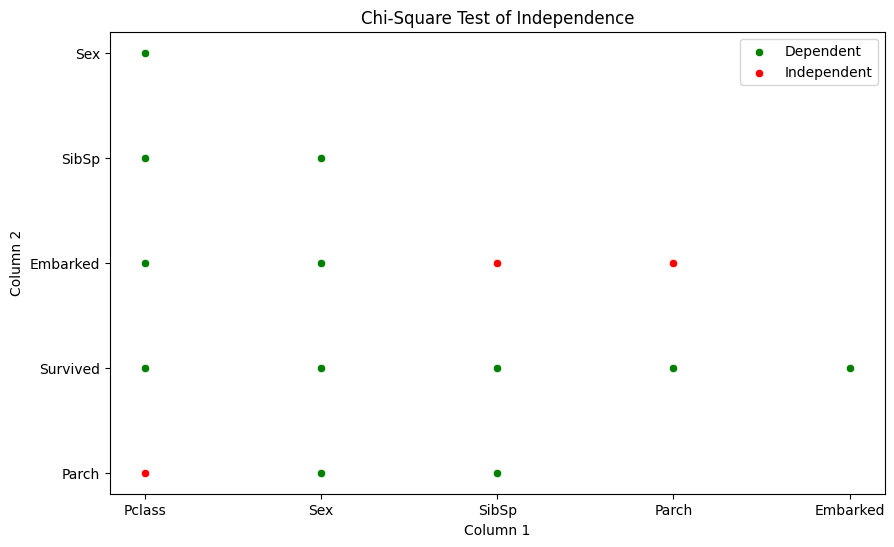

In [12]:
def chi_square_dependency_test(df, columns):
    dependent_pairs = []
    independent_pairs = []

    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Consider a p-value threshold of 0.05 for significance
            if p < 0.05:
                dependent_pairs.append((col1, col2))
            else:
                independent_pairs.append((col1, col2))

    # Plot the results
    plt.figure(figsize=(10, 6))

    if dependent_pairs:
        sns.scatterplot(x=[x[0] for x in dependent_pairs],
                        y=[x[1] for x in dependent_pairs],
                        color='green', label='Dependent')

    if independent_pairs:
        sns.scatterplot(x=[x[0] for x in independent_pairs],
                        y=[x[1] for x in independent_pairs],
                        color='red', label='Independent')

    plt.title('Chi-Square Test of Independence')
    plt.xlabel('Column 1')
    plt.ylabel('Column 2')
    plt.legend()
    plt.show()

titanic_train_category = titanic_train.drop(['Age', 'Fare'], axis=1)
chi_square_dependency_test(titanic_train_category, titanic_train_category.columns)

## חלק מהפיצר אינגנירינג שבתוכו יש פיצר סלקשן
# אפשר לראות שכל המאפיינים הקטגוריים , ועמודת המטרה תלויים
# בנוסף אפשר לראות שעמודת אימברקט סיבסאפ בלתי תלויות ושתיהן תליות בעמודת המטרה לכן נרצה להשאיר את שניהם


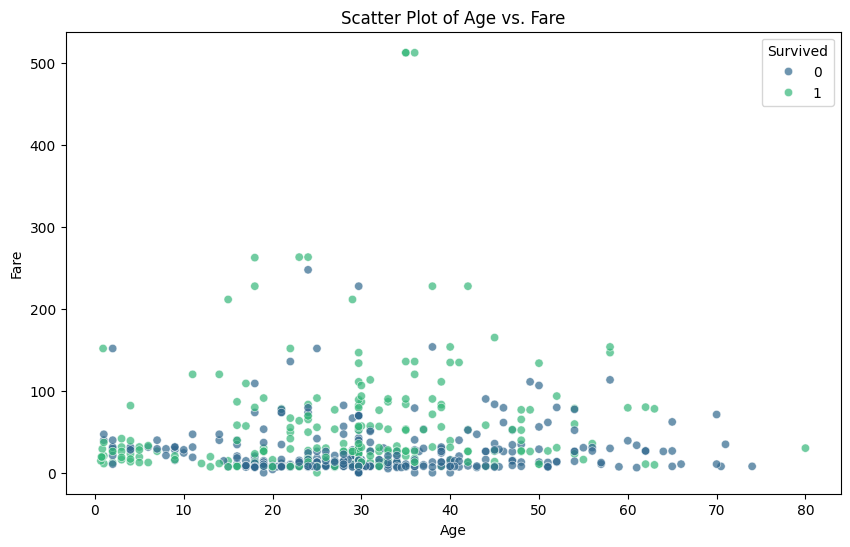

In [13]:
# The strong negative correlation between these two features (Pclass and Fare) indicates that passengers in higher classes (lower numerical values) tend to pay more for their tickets
# Age and SibSp: There is a slight positive correlation, meaning older passengers tended to have more siblings/spouses aboard
# Fare and Survived: There is a moderate positive correlation, suggesting that passengers who paid higher fares had a higher chance of survival
# we can see there no significal relation between Age and Fare

plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_train, x='Age', y='Fare', hue='Survived', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

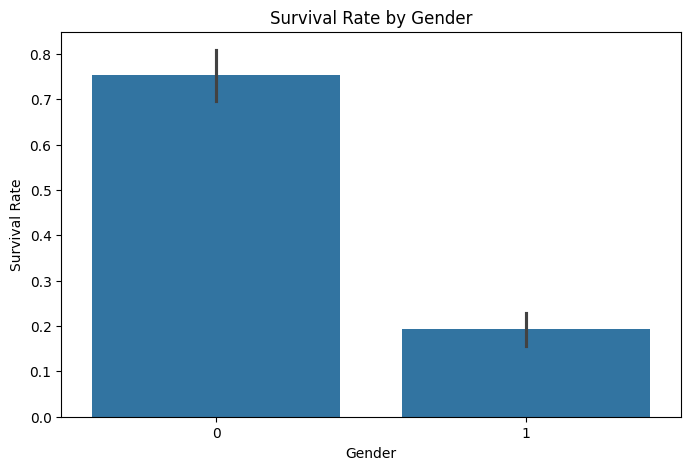

In [14]:
# Survival Rate by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_train, estimator=lambda x: sum(x)/len(x))
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

#

<ipython-input-15-e9e29799dca5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
<ipython-input-15-e9e29799dca5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
<ipython-input-15-e9e29799dca5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
<ipython-input-15-e9e29799dca5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

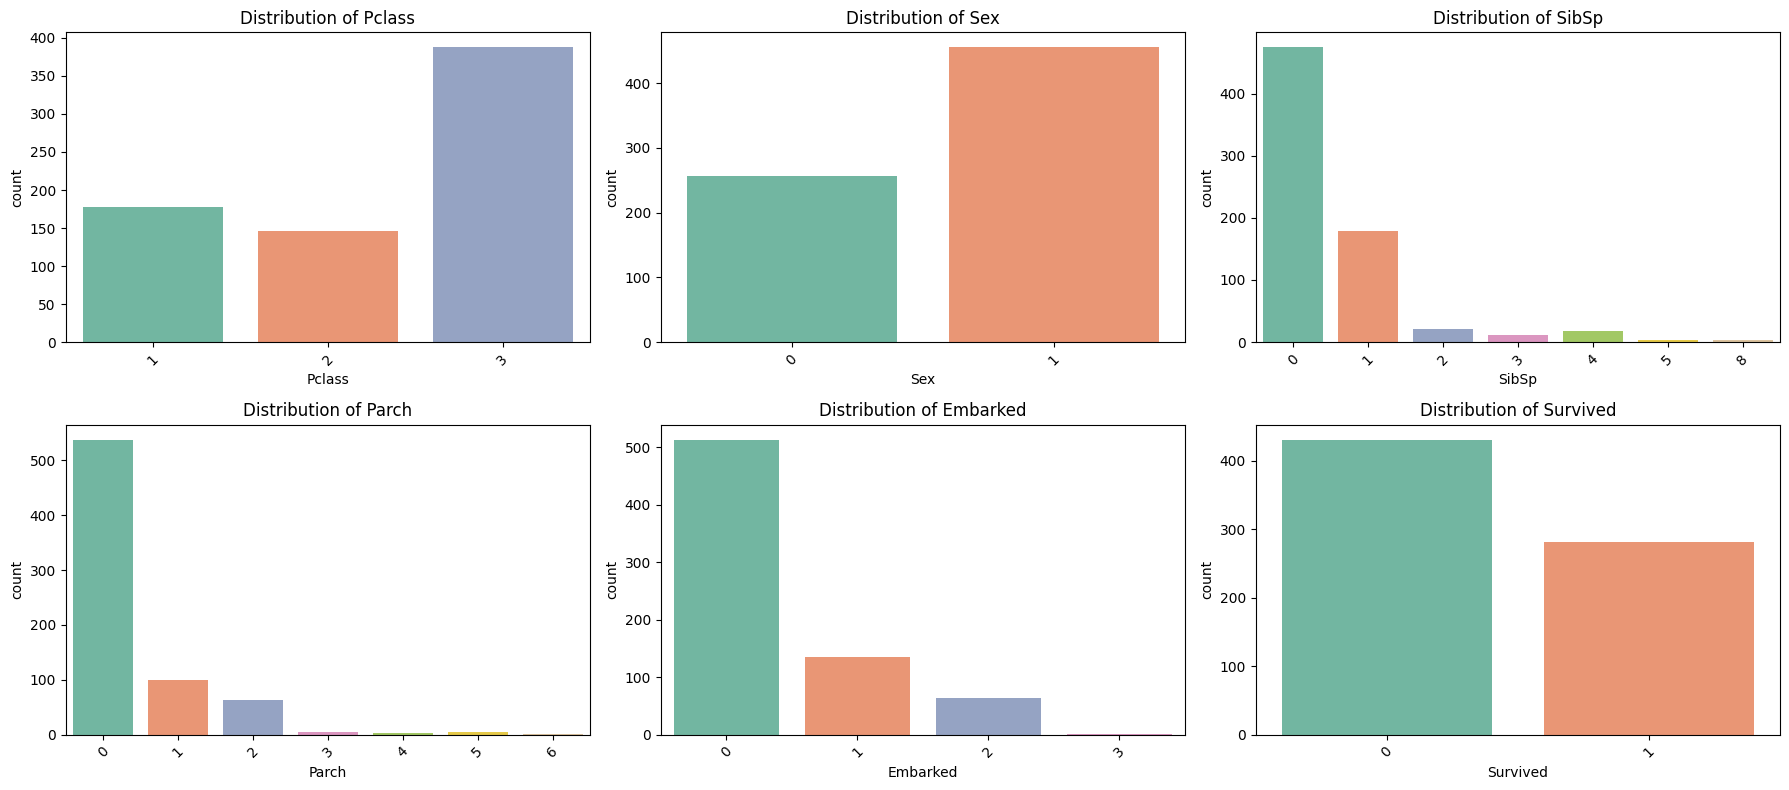

In [15]:

def plot_categorical_columns_grid(df):
    categorical_columns = df.select_dtypes(include=['int']).columns
    num_cols = len(categorical_columns)

    # קביעת מספר השורות והעמודות בהתאם לכמות המשתנים הקטגוריים
    rows = (num_cols + 2) // 3  # 3 גרפים בשורה
    fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))  # יצירת גריד של גרפים
    axes = axes.flatten()  # Flatten to easily iterate over axes

    for i, col in enumerate(categorical_columns):
        sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

    # הסרת צירים ריקים אם אין מספיק עמודות
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_columns_grid(titanic_train_category)


## Part 3 - Experiments
You could add as many code cells as needed

### Feature Engineering

In [16]:
# Check for null values
titanic_train.isna().sum() # there are None


,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Survived,0


In [17]:

def remove_outliers_zscore(df, threshold=3):
    numeric_columns = df.select_dtypes(include=['float64']).columns
    df_clean = df.copy()

    for col in numeric_columns:
        col_zscore = (df[col] - df[col].mean()) / df[col].std()
        df_clean = df_clean[(col_zscore.abs() <= threshold)]

    return df_clean


titanic_train_no_outlier = remove_outliers_zscore(titanic_train)
titanic_train_no_outlier.shape



<ipython-input-17-de3c3cc0f1b4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(col_zscore.abs() <= threshold)]


(693, 8)

In [18]:
titanic_train_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    693 non-null    int64  
 1   Sex       693 non-null    int64  
 2   Age       693 non-null    float64
 3   SibSp     693 non-null    int64  
 4   Parch     693 non-null    int64  
 5   Fare      693 non-null    float64
 6   Embarked  693 non-null    int64  
 7   Survived  693 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.7 KB


In [19]:
# Separate features and labels
X_train = titanic_train.drop(columns=['Survived'])  # Features from Titanic training set
y_train = titanic_train['Survived']  # Labels from training set
X_test = titanic_test.drop(columns=['Survived'])  # Features from Titanic test set
y_test = titanic_test['Survived']  # Labels from test set

# Define feature engineering options (scale)
feature_engineering_options = {
    'none': lambda X: X,  # No feature engineering, use raw features
    'Standard': lambda X: StandardScaler().fit_transform(X),  # Standard scaling
    'minmax': lambda X: MinMaxScaler().fit_transform(X),  # Min-Max scaling
    'polynomial': lambda X: PolynomialFeatures(degree=2).fit_transform(X)  # Polynomial features
}

# Define models and their parameters
models_params = {
    'Random Forest': {
        'estimator': RandomForestClassifier(),  # Random Forest classifier
        'params': {  # Hyperparameters for grid search
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'Knn': {  # K-Nearest Neighbors model
        'estimator': KNeighborsClassifier(),  # KNN classifier
        'params': {  # Hyperparameters for grid search
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    # 'Decision Tree': {
    #     'estimator': DecisionTreeClassifier(),  # Decision Tree classifier
    #     'params': {  # Hyperparameters for grid search
    #         'max_depth': [None, 10, 20],
    #         'min_samples_split': [2, 5]
    #     }
    # },
    # 'Svm': {  # Support Vector Classifier model
    #     'estimator': SVC(),  # Support Vector Classifier
    #     'params': {  # Hyperparameters for grid search
    #         'C': [0.1, 1, 10],
    #         'kernel': ['linear', 'rbf']
    #     }
    # }
}

# Define evaluation function (scorer)
scorer = make_scorer(f1_score, average='binary')  # Use macro averaging for F1 score

# Training and optimization results
results = []

# Train and optimize all combinations
for fe_name, fe_func in feature_engineering_options.items():  # Iterate over each feature engineering method
    for model_name, model_info in models_params.items():  # Iterate over each model and its parameters
        estimator = model_info['estimator']  # Retrieve the model object (estimator)
        params = model_info['params']  # Retrieve the hyperparameters

        X_train_fe = fe_func(X_train)  # Apply the current feature engineering method to the training set

        grid_search = GridSearchCV(estimator, params, cv=5, scoring=scorer)  # Set up GridSearchCV for hyperparameter tuning
        grid_search.fit(X_train_fe, y_train)  # Fit the grid search model on the preprocessed training data

        X_test_fe = fe_func(X_test)  # Apply the current feature engineering method to the test set
        y_pred = grid_search.best_estimator_.predict(X_test_fe)  # Predict labels for the test set using the best model found
        f1 = f1_score(y_test, y_pred, average='binary')  # Calculate the F1 score on the test set predictions

        results.append({  # Save the results for this combination of feature engineering method and model
            'Feature': fe_name,
            'Model': model_name,
            'Best Params': grid_search.best_params_,
            'Best CV': grid_search.best_score_,
            'Test F1': f1
        })

# Summarize results
results_df = pd.DataFrame(results)
print(results_df.to_markdown())

# Display the best combination
best_result = results_df.loc[results_df['Test F1'].idxmax()]
print(f"Best combination:\n{best_result}")


# לעשות דאטה פריים שמציג כל אלגותים עם כל הפרמטרים העי טובים שלו והאחוז דיוק שלו
# Random forest accuracy: ~ 0.87, knn ~ 0.76, dt ~.76

|    | Feature    | Model         | Best Params                                                    |   Best CV |   Test F1 |
|---:|:-----------|:--------------|:---------------------------------------------------------------|----------:|----------:|
|  0 | none       | Random Forest | {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100} |  0.768404 |  0.840336 |
|  1 | none       | Knn           | {'n_neighbors': 7, 'weights': 'uniform'}                       |  0.587674 |  0.574074 |
|  2 | Standard   | Random Forest | {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200} |  0.763184 |  0.842105 |
|  3 | Standard   | Knn           | {'n_neighbors': 3, 'weights': 'uniform'}                       |  0.740573 |  0.764228 |
|  4 | minmax     | Random Forest | {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200} |  0.764925 |  0.741379 |
|  5 | minmax     | Knn           | {'n_neighbors': 3, 'weights': 'uniform'}                       |  0.734954 |  0.727273 |


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [20]:
# נניח שהקומבינציה הטובה ביותר היא feature engineering 'Standard',
# מודל RandomForest, והפרמטרים ההיפר-פרמטריים שנמצאו הכי טובים מהניסויים הקודמים.

# שלב 1: בחירת feature engineering המתאים
best_fe_func = feature_engineering_options['Standard']  # Replace 'Standard' with the best method

# שלב 2: ביצוע feature engineering על כל ה-training set
X_train_fe = best_fe_func(X_train)

# שלב 3: אימון המודל עם ה-best hyperparameters שנמצאו עבור המודל
best_model = RandomForestClassifier(
    n_estimators=200,  # תחליפו לפי התוצאות מהניסויים
    max_depth=20,
    min_samples_split=2
)

# שלב 4: אימון המודל על כל ה-training set
best_model.fit(X_train_fe, y_train)

# שלב 5: ביצוע feature engineering על ה-test set
X_test_fe = best_fe_func(X_test)

# שלב 6: בדיקת הביצועים על ה-test set
y_pred = best_model.predict(X_test_fe)
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Final F1 score on test set: {f1}")

Final F1 score on test set: 0.8067226890756303


## Part 5 - Apply on test and show model performance estimation

In [21]:
# שלב 1: בחירת feature engineering המתאים
best_fe_func = feature_engineering_options['Standard']  # Replace 'Standard' with the best method

# שלב 2: ביצוע feature engineering על ה-test set
X_test_fe = best_fe_func(X_test)

# שלב 3: חיזוי על ה-test set עם המודל המאומן
y_pred = best_model.predict(X_test_fe)

# שלב 4: הצגת 5 החיזויים הראשונים
print("5 predictions on the test set:")
print(y_pred[:5])

# שלב 5: בדיקת איכות המודל עם מדד F1
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Final F1 score on test set: {f1}")

5 predictions on the test set:
[0 0 0 0 1]
Final F1 score on test set: 0.8067226890756303


In [22]:
print(y_pred)

[0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0]
